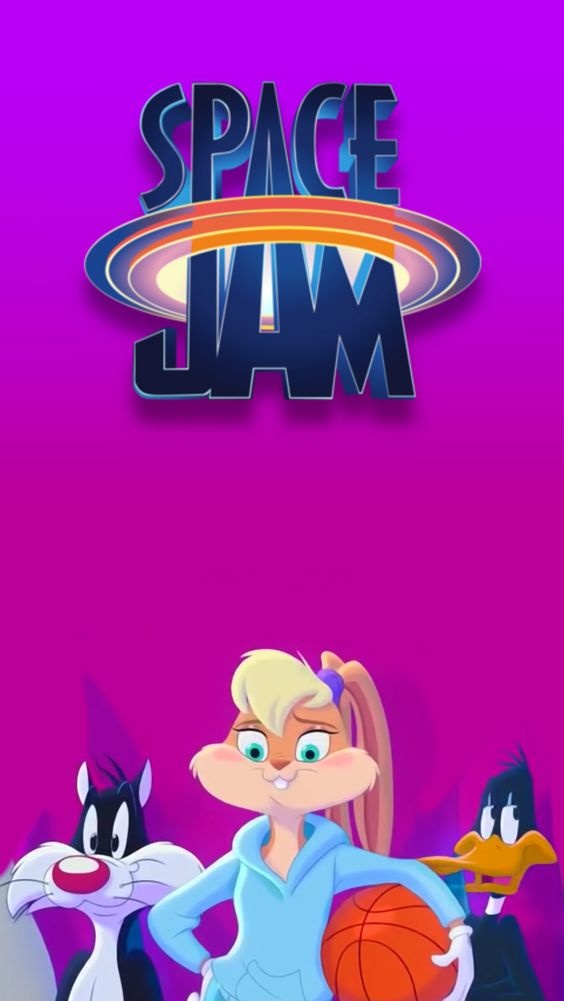

In [2]:
from IPython.display import display, Image
import cv2 as cv

# 이미지 파일 읽기
img = cv.imread('a.jpg')

# 이미지를 출력 창에 표시
display(Image(data=cv.imencode('.jpg', img)[1].tobytes()))


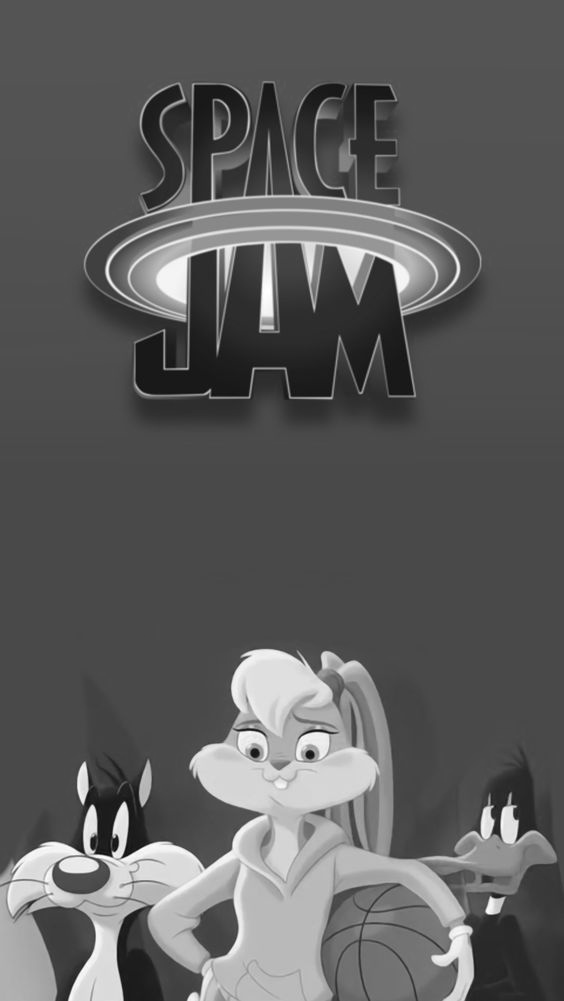

In [4]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
display(Image(data=cv.imencode('.jpg', gray)[1].tobytes()))

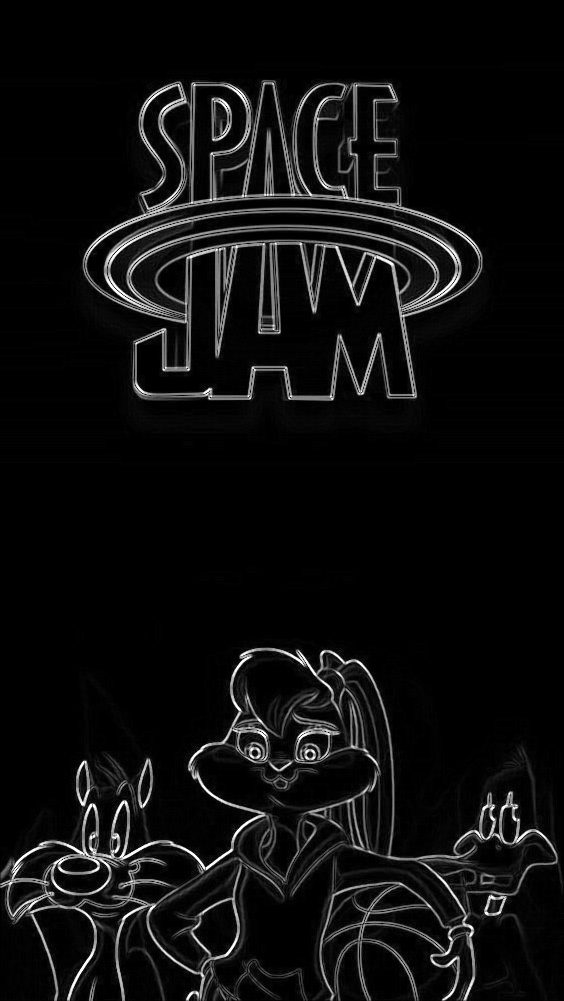

In [9]:
gradx = cv.Sobel(gray,cv.CV_32F,1,0,ksize=3)#sobel calculate
grady = cv.Sobel(gray,cv.CV_32F,0,1,ksize=3)

sobel_x=cv.convertScaleAbs(gradx)#absolute
sobel_y=cv.convertScaleAbs (grady)
edge_strength=cv.addWeighted(sobel_x,0.5,sobel_y,0.5,0) # 에지 강도 계산


display(Image(data=cv.imencode('.jpg', edge_strength)[1].tobytes()))

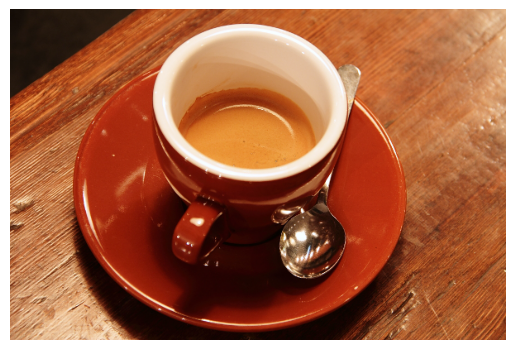

In [3]:
import skimage
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 이미지 불러오기
img = skimage.data.coffee()

# 이미지 출력
plt.imshow(img)
plt.axis('off')  # 이미지 주변의 축 제거
plt.show()

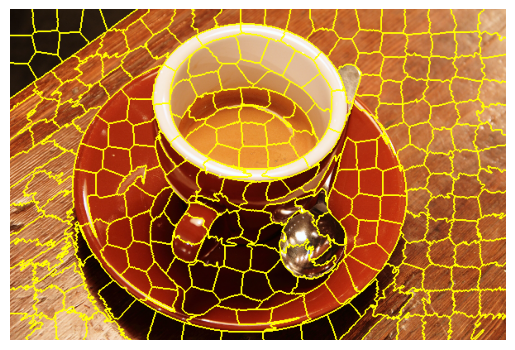

In [8]:
slic1 = skimage.segmentation.slic(img, compactness=20, n_segments=300)
sp_image1 = skimage.segmentation.mark_boundaries(img,slic1)
sp_image1 = np.uint8(sp_image1*255.0)
plt.imshow(sp_image1)
plt.axis('off')  # 이미지 주변의 축 제거
plt.show()

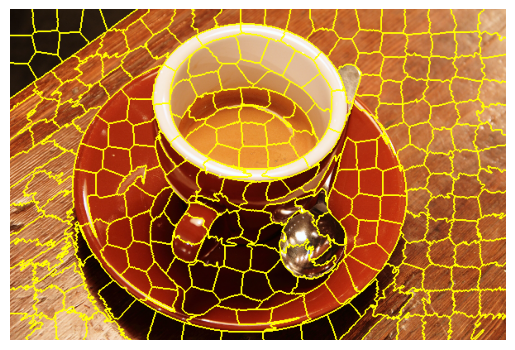

In [9]:
slic2 = skimage.segmentation.slic(img, compactness=100, n_segments=300)
sp_image2 = skimage.segmentation.mark_boundaries(img,slic1)
sp_image2 = np.uint8(sp_image2*255.0)
plt.imshow(sp_image2)
plt.axis('off')  # 이미지 주변의 축 제거
plt.show()

In [11]:
import time
start = time.time()
slic = skimage.segmentation.slic(img,compactness=20,n_segments=600,start_label=1)
g = skimage.future.graph.reg_mean_color(img,slic,mode = 'similarity')
ncut = skimage.future.graph.cut_normalized(slic,g)
print(img.shape,'Coffee',time.time()-start,'time')
marking = skimage.segmentation.mark_boundaries(img,ncut)
ncut_coffee = np.uint8(marking*255)
plt.imshow(ncut_coffee)
plt.axis('off')  # 이미지 주변의 축 제거
plt.show()

AttributeError: module 'skimage.future' has no attribute 'graph'

In [12]:
import numpy as np
import skimage.data
import skimage.segmentation
import skimage.future.graph as graph
import skimage.color
import matplotlib.pyplot as plt

# Load the coffee image
img = skimage.data.coffee()

# Use SLIC segmentation to get superpixels
labels = skimage.segmentation.slic(img, compactness=30, n_segments=400)

# Construct a RAG
rag = graph.rag_mean_color(img, labels, mode='similarity')

# Apply the normalized cut
labels_ncut = graph.cut_normalized(labels, rag)

# Visualize
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                        sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(skimage.color.label2rgb(labels_ncut, img, kind='avg'))
ax[1].set_title('Segmentation with Ncut')
ax[1].axis('off')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'skimage.future.graph'